In [15]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

In [16]:
# Define the color masks
GRAVEYARD = ([252, 252, 252], [116, 116, 116])
FOREST = [(0, 168, 0), [252, 216, 168]]
MOUNT = [(200, 76, 12), [252, 216, 168]]

# Dictionary to access masks by name
MASKS = {
    "GRAVEYARD": GRAVEYARD,
    "FOREST": FOREST,
    "MOUNT": MOUNT
}

In [17]:
def style(img, mask_name):
    
    # Get the target mask
    target_mask = MASKS[mask_name]

    # Get the masks to be changed
    masks_to_change = [mask for name, mask in MASKS.items() if name != mask_name]

    # Create masks for the colors to be changed
    mask1 = np.all(img == masks_to_change[0][0], axis=-1)
    mask2 = np.all(img == masks_to_change[0][1], axis=-1)
    mask3 = np.all(img == masks_to_change[1][0], axis=-1)
    mask4 = np.all(img == masks_to_change[1][1], axis=-1)

    # Apply the target mask colors
    img[mask1] = target_mask[0]
    img[mask2] = target_mask[1]
    img[mask3] = target_mask[0]
    img[mask4] = target_mask[1]
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [21]:
tile_set_path = 'biomless_tile'
tile_size = 16
tiles = []
for filename in os.listdir(tile_set_path):
    tile = cv2.imread(os.path.join(tile_set_path, filename))
    tile = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
    tiles.append(tile)

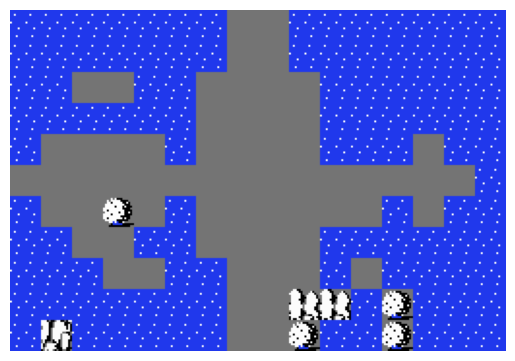

In [24]:

# Load the tensor from the .npy file
random_mask_name = random.choice(list(MASKS.keys()))
# random_mask = MASKS[random_mask_name]

tensor = np.load('generated_sample/normal/sample_0.npy')


styled_tiles = []
for tile in tiles:
    styled_tile = style(tile, random_mask_name)
    styled_tiles.append(styled_tile)

# Get the dimensions of the tiles
tile_height, tile_width, _ = tiles[0].shape

# Create a blank image with the size to hold all the tiles
full_image = np.zeros((tensor.shape[0] * tile_height, tensor.shape[1] * tile_width, 3), dtype=np.uint8)

# Decode the one-hot encoding and place the correct tile in the final image
for x in range(tensor.shape[0]):
    for y in range(tensor.shape[1]):
        # Find the index of the tile (one-hot encoding to index)
        tile_index = np.argmax(tensor[x, y])
        
        # Get the corresponding tile
        tile = styled_tiles[tile_index]
        
        # Place the tile in the correct position in the full image
        start_x = x * tile_height
        start_y = y * tile_width
        full_image[start_x:start_x + tile_height, start_y:start_y + tile_width] = tile
        
full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)

# Display the full image using OpenCV
plt.imshow(full_image)
plt.axis('off')  # Hide the axis
plt.show()


In [23]:
output_list = ['colorized_sample/tiny', 'colorized_sample/normal', 'colorized_sample/large']
input_list = ['generated_sample/tiny', 'generated_sample/normal', 'generated_sample/large']

for input_path, output_path in zip(input_list, output_list):

    output_path = output_path
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    input_path = input_path

    for filename in os.listdir(input_path):
        tensor_path = os.path.join(input_path, filename)
        tensor = np.load(tensor_path)
        random_mask_name = random.choice(list(MASKS.keys()))
        styled_tiles = []
        
        # inefficiente ma non mi va
        for tile in tiles:
            styled_tile = style(tile, random_mask_name)
            styled_tiles.append(styled_tile)
        
        # Get the dimensions of the tiles
        tile_height, tile_width, _ = tiles[0].shape

        # Create a blank image with the size to hold all the tiles
        full_image = np.zeros((tensor.shape[0] * tile_height, tensor.shape[1] * tile_width, 3), dtype=np.uint8)

        # Decode the one-hot encoding and place the correct tile in the final image
        for x in range(tensor.shape[0]):
            for y in range(tensor.shape[1]):
                # Find the index of the tile (one-hot encoding to index)
                tile_index = np.argmax(tensor[x, y])
                
                # Get the corresponding tile
                tile = styled_tiles[tile_index]
                
                # Place the tile in the correct position in the full image
                start_x = x * tile_height
                start_y = y * tile_width
                full_image[start_x:start_x + tile_height, start_y:start_y + tile_width] = tile
                
        # full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)
        output_file_path = os.path.join(output_path, f'{filename}.png')
        cv2.imwrite(output_file_path, full_image)